# Task 3
5390<br>
Elaina Rohlfing


## Load the data
* Upload & unzip the dataset
* Load training and validation images
* Combine images into single folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip "/content/drive/MyDrive/Colab Notebooks/bears_ws.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/bears_ws.zip
   creating: bears/
  inflating: bears/.DS_Store         
  inflating: __MACOSX/bears/._.DS_Store  
   creating: bears/test/
   creating: bears/training/
   creating: bears/validation/
   creating: bears/test/polar/
  inflating: bears/test/.DS_Store    
  inflating: __MACOSX/bears/test/._.DS_Store  
   creating: bears/test/panda/
   creating: bears/test/grizzly/
   creating: bears/training/polar/
  inflating: bears/training/.DS_Store  
  inflating: __MACOSX/bears/training/._.DS_Store  
   creating: bears/training/panda/
   creating: bears/training/grizzly/
   creating: bears/validation/polar/
  inflating: bears/validation/.DS_Store  
  inflating: __MACOSX/bears/validation/._.DS_Store  
   creating: bears/validation/panda/
   creating: bears/validation/grizzly/
  inflating: bears/test/polar/polar_1198.jpg  
  inflating: bears/test/polar/polar_1167.jpg  
  inflating: bears/test/polar/polar_1359.jpg  
  inflating: bears/test/po

In [ ]:
mv "/content/drive/MyDrive/Colab Notebooks/bears" "/content/bears"

mv: cannot stat '/content/drive/MyDrive/Colab Notebooks/bears': No such file or directory


In [ ]:
! ls -l

total 16
drwxr-xr-x 5 root root 4096 Dec 15  2022 bears
drwx------ 6 root root 4096 Apr 24 00:41 drive
drwxr-xr-x 3 root root 4096 Apr 24 00:41 __MACOSX
drwxr-xr-x 1 root root 4096 Apr 22 13:25 sample_data


In [ ]:
! ls -l "/content/bears"

total 12
drwxr-xr-x 5 root root 4096 Dec 15  2022 test
drwxr-xr-x 5 root root 4096 Dec 15  2022 training
drwxr-xr-x 5 root root 4096 Dec 15  2022 validation


## Prepare images (validation)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)

image_size = (120, 120)
batch = 32
# Generator for training dataset
train = my_generator.flow_from_directory( "/content/bears/training", target_size=image_size, shuffle=True, batch_size=batch)

# Generator for validation dataset
val = my_generator.flow_from_directory( "/content/bears/validation", target_size=image_size, shuffle=True, batch_size=batch)


Found 718 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


## Function to plot learning curves
Look back and investigate the training by comparing the accuracy on the training dataset and validation dataset

In [ ]:
import matplotlib.pyplot as plt
def plot_history(hist, title):
    fig, axs = plt.subplots(2, 1, figsize=(6, 7))

    axs[0].plot(hist.epoch, hist.history['accuracy'], label='Training Accuracy')
    axs[0].plot(hist.epoch, hist.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title("Accuracy for " + title)
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Accuracy")
    axs[0].set_ylim([0, 1])
    axs[0].legend()

    axs[1].plot(hist.epoch, hist.history['loss'], label='Training Loss')
    axs[1].plot(hist.epoch, hist.history['val_loss'], label='Validation Loss')

    axs[1].set_title("Loss for " + title)
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("Loss")
    axs[1].set_ylim([0, 1])
    axs[1].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
print(f'{train.class_indices=}')
print(f'{train.num_classes=}')
print(f'{train.batch_size=}')
print(f'{train.samples=}')
print(f'{train.image_shape=}')

train.class_indices={'grizzly': 0, 'panda': 1, 'polar': 2}
train.num_classes=3
train.batch_size=32
train.samples=718
train.image_shape=(120, 120, 3)


Display one image and its label

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Take one batch full of images
def display_image(dataset, index=0, batch=0):
    images, labels = dataset[batch]
    print(images.shape)
    idx = np.argmax(labels[index]) # get label index
    classes = list(train.class_indices.keys())
    plt.imshow(images[index])
    plt.title(f"{str(labels[index])} {classes[idx]}") # add name of label train_ds.class_indices
    plt.axis("off")

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.fitmodel-7.hg5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)

early_stop_callback = EarlyStopping(monitor="val_loss", patience=20, verbose=1)


In [ ]:
plot_history(history7, "Model 7")

NameError: name 'history7' is not defined

## Function to view model predictions

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def peek_predictions(model, dataset, num_images=5):
    images, labels = dataset[0]
    classes = list(dataset.class_indices.keys())
    for i in range(len(images)):
        idx = np.argmax(labels[i]) # get label index
        x = images[i]
        plt.figure()
        plt.imshow(x)

        x = np.expand_dims(x, axis=0)
        p = model.predict(x, verbose=0)

        plt.title(f'Prediction: {p.argmax()} {classes[p.argmax()]}') # add name of label train_ds.class_indices
        plt.show()
        print(f"Ground truth: {classes[idx]} {idx} {str(labels[i])}") # add name of label
        print(f'Prediction:\t{classes[p.argmax()]} {p.argmax()} {p}')
        if i == num_images: break

# Load best model and augment with zoom, rotate, flip

In [ ]:
from keras import saving
model = saving.load_model('/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.fitmodel-7.hg5')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer_conv (Conv2D)   (None, 120, 120, 64)      1792      
                                                                 
 first_layer_pool (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 2, 2, 32)         

In [ ]:
model.evaluate(val)

8/8 [==============================] - 3s 69ms/step - loss: 0.1935 - accuracy: 0.9333


[0.19353389739990234, 0.9333333373069763]

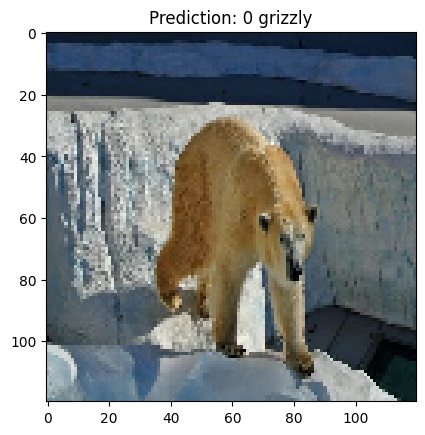

Ground truth: polar 2 [0. 0. 1.]
Prediction:	grizzly 0 [[0.7771319  0.0015526  0.22131555]]


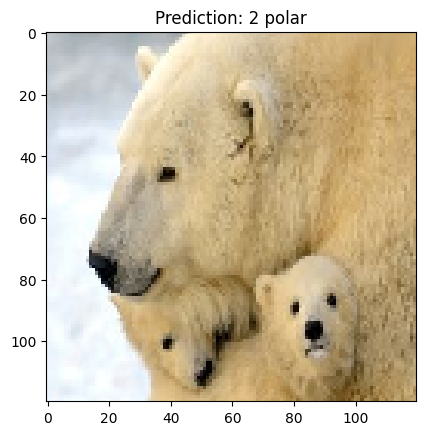

Ground truth: polar 2 [0. 0. 1.]
Prediction:	polar 2 [[1.3396372e-03 2.0388161e-05 9.9864000e-01]]


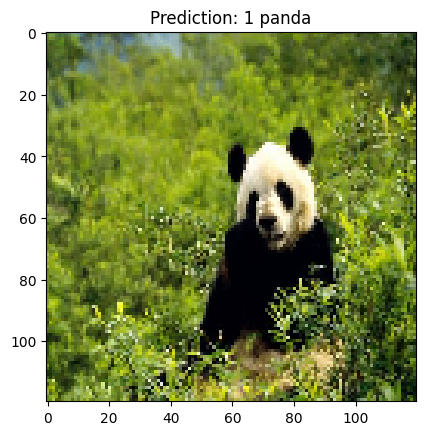

Ground truth: panda 1 [0. 1. 0.]
Prediction:	panda 1 [[1.3022423e-03 9.9869341e-01 4.4410563e-06]]


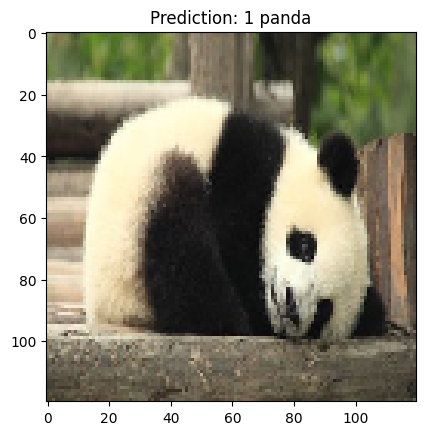

Ground truth: panda 1 [0. 1. 0.]
Prediction:	panda 1 [[1.0322714e-03 9.9896634e-01 1.4152722e-06]]


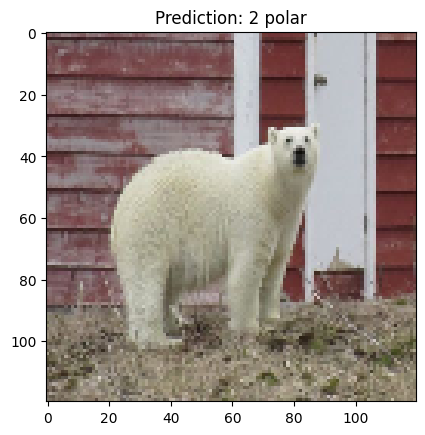

Ground truth: polar 2 [0. 0. 1.]
Prediction:	polar 2 [[7.2831428e-04 2.1331808e-04 9.9905843e-01]]


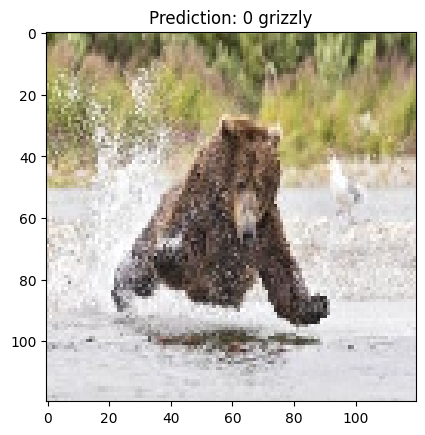

Ground truth: grizzly 0 [1. 0. 0.]
Prediction:	grizzly 0 [[9.9975175e-01 1.0076206e-04 1.4756699e-04]]


In [ ]:
peek_predictions(model, val)

## Prepare augmented data sets

In [ ]:
augmentation_gen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)

In [ ]:
#original variables, update or keep the same
image_size = train.image_shape[:2]
batch = batch
aug_train = augmentation_gen.flow_from_directory("/content/bears/training", target_size=image_size, batch_size=batch, class_mode='categorical')

Found 718 images belonging to 3 classes.


In [ ]:
aug_train.image_shape

(120, 120, 3)

(32, 120, 120, 3)


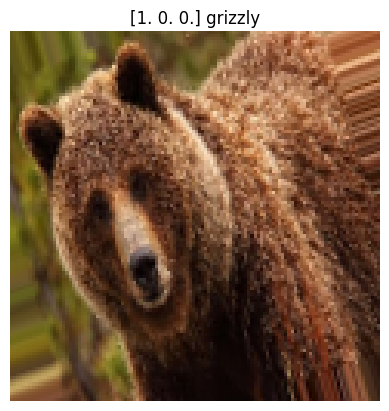

In [ ]:
display_image(aug_train, 10)

## Train best model with augmented data

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.aug-model-1.hg5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)

early_stop_callback = EarlyStopping(monitor="val_loss", patience=20, verbose=1)

In [ ]:
history1 = model.fit(aug_train, epochs=200, validation_data=val, callbacks=[checkpoint_callback, early_stop_callback], verbose=1)

Epoch 1/200
23/23 [==============================] - 11s 315ms/step - loss: 0.1947 - accuracy: 0.9276 - val_loss: 0.2736 - val_accuracy: 0.8833
Epoch 2/200
23/23 [==============================] - 6s 251ms/step - loss: 0.1155 - accuracy: 0.9582 - val_loss: 0.2413 - val_accuracy: 0.9250
Epoch 3/200
23/23 [==============================] - 6s 249ms/step - loss: 0.0630 - accuracy: 0.9805 - val_loss: 0.2354 - val_accuracy: 0.9333
Epoch 4/200
23/23 [==============================] - 5s 199ms/step - loss: 0.0655 - accuracy: 0.9763 - val_loss: 0.2810 - val_accuracy: 0.9125
Epoch 5/200
23/23 [==============================] - 5s 201ms/step - loss: 0.0601 - accuracy: 0.9749 - val_loss: 0.3009 - val_accuracy: 0.9208
Epoch 6/200
23/23 [==============================] - 5s 199ms/step - loss: 0.0899 - accuracy: 0.9735 - val_loss: 0.5801 - val_accuracy: 0.8750
Epoch 7/200
23/23 [==============================] - 5s 202ms/step - loss: 0.1383 - accuracy: 0.9499 - val_loss: 0.2378 - val_accuracy: 0.941

## Visualize Learning curves

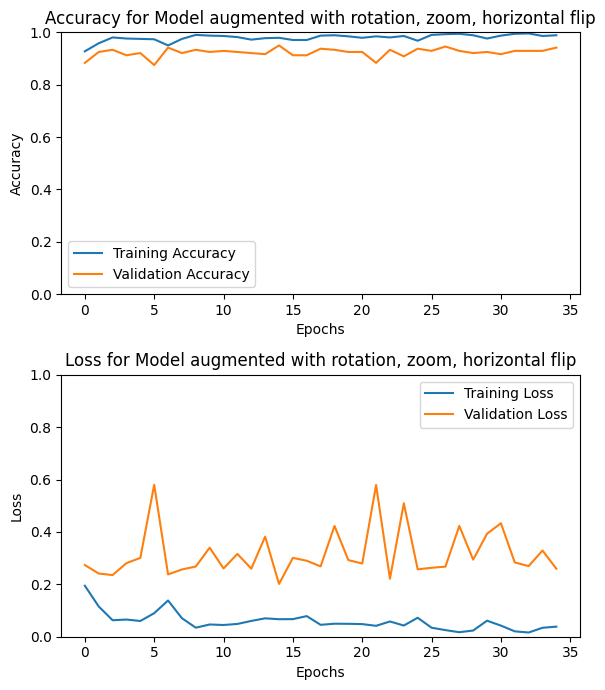

In [ ]:
plot_history(history1, "Model augmented with rotation, zoom, horizontal flip")

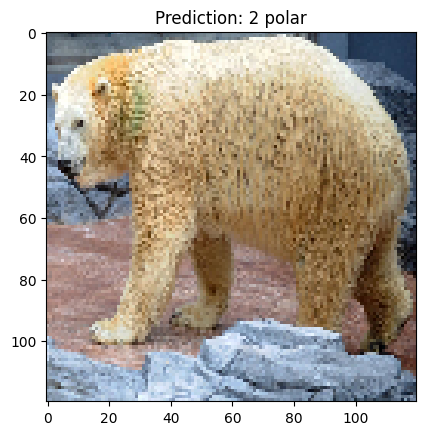

Ground truth: polar 2 [0. 0. 1.]
Prediction:	polar 2 [[1.2103256e-01 2.6106472e-06 8.7896478e-01]]


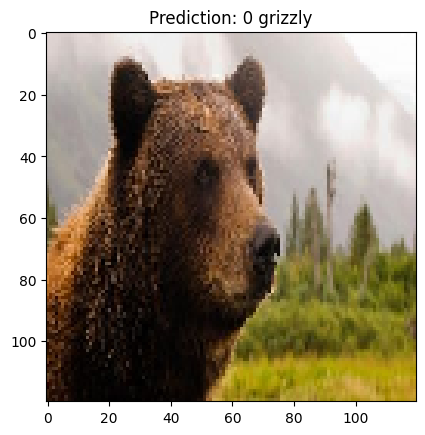

Ground truth: grizzly 0 [1. 0. 0.]
Prediction:	grizzly 0 [[9.998895e-01 5.312733e-05 5.731345e-05]]


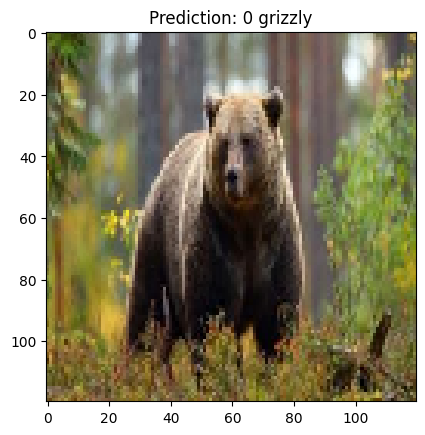

Ground truth: grizzly 0 [1. 0. 0.]
Prediction:	grizzly 0 [[9.9921441e-01 7.8135432e-04 4.1236717e-06]]


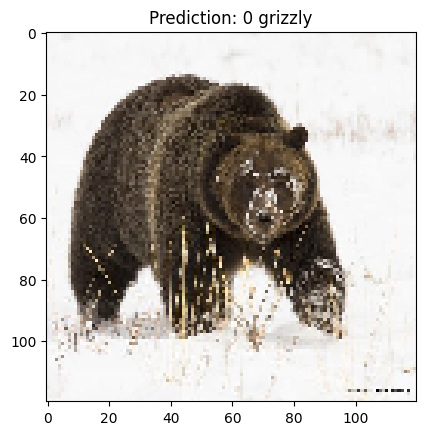

Ground truth: grizzly 0 [1. 0. 0.]
Prediction:	grizzly 0 [[1.0000000e+00 2.3425137e-08 1.9440161e-09]]


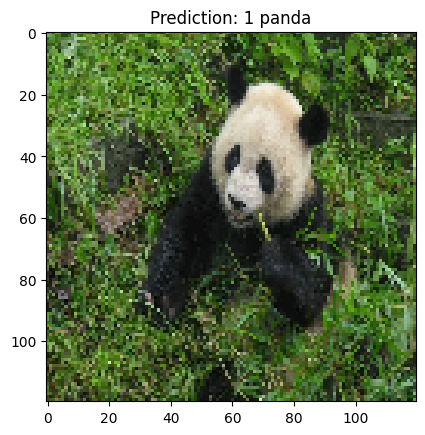

Ground truth: panda 1 [0. 1. 0.]
Prediction:	panda 1 [[2.1065138e-03 9.9788159e-01 1.1871282e-05]]


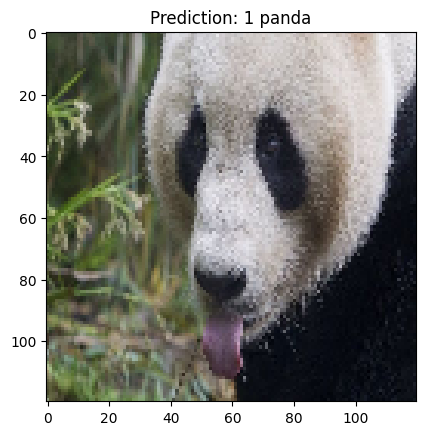

Ground truth: panda 1 [0. 1. 0.]
Prediction:	panda 1 [[3.6964868e-04 9.9961472e-01 1.5558820e-05]]


In [ ]:
#peek_predictions(model, val)

# Load best model and augment with zoom

In [ ]:
from keras import saving
model2 = saving.load_model('/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.fitmodel-7.hg5')

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer_conv (Conv2D)   (None, 120, 120, 64)      1792      
                                                                 
 first_layer_pool (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 2, 2, 32)         

In [ ]:
model2.evaluate(val)

8/8 [==============================] - 1s 75ms/step - loss: 0.1935 - accuracy: 0.9333


[0.19353388249874115, 0.9333333373069763]

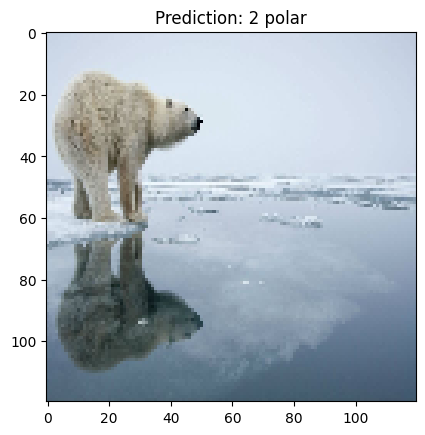

Ground truth: polar 2 [0. 0. 1.]
Prediction:	polar 2 [[2.1291111e-04 1.8050645e-05 9.9976903e-01]]


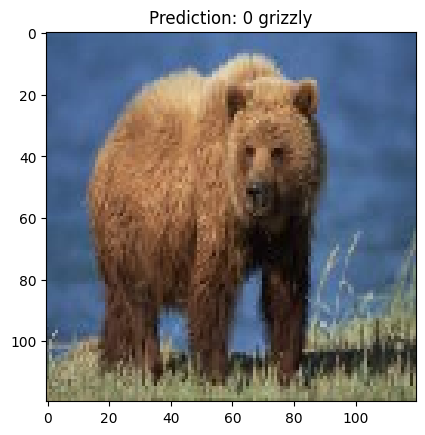

Ground truth: grizzly 0 [1. 0. 0.]
Prediction:	grizzly 0 [[9.9310243e-01 3.7659332e-04 6.5209940e-03]]


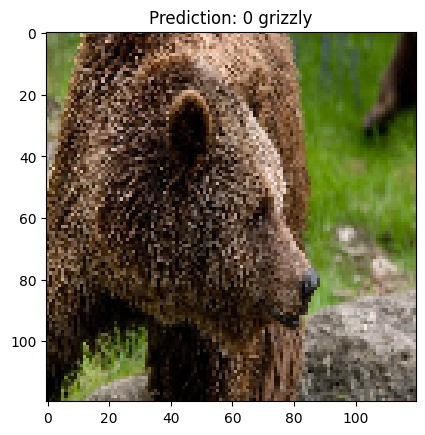

Ground truth: grizzly 0 [1. 0. 0.]
Prediction:	grizzly 0 [[9.9555570e-01 6.8674335e-04 3.7575385e-03]]


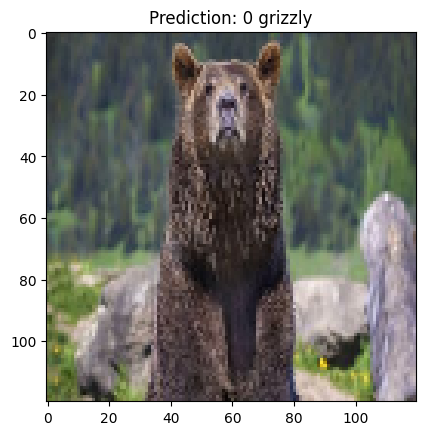

Ground truth: grizzly 0 [1. 0. 0.]
Prediction:	grizzly 0 [[9.9733114e-01 6.9742819e-04 1.9714553e-03]]


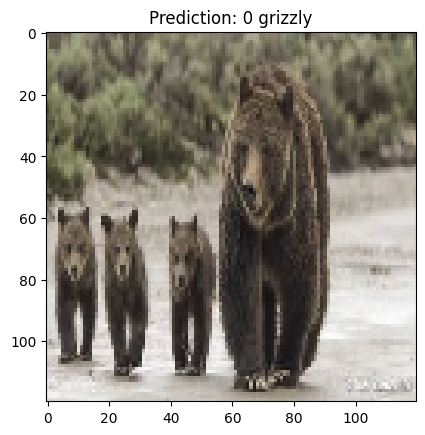

Ground truth: grizzly 0 [1. 0. 0.]
Prediction:	grizzly 0 [[9.9952257e-01 4.6207202e-05 4.3116021e-04]]


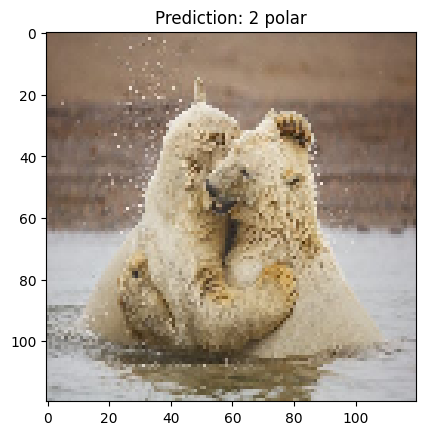

Ground truth: polar 2 [0. 0. 1.]
Prediction:	polar 2 [[5.6842137e-02 4.0928597e-04 9.4274861e-01]]


In [ ]:
peek_predictions(model2, val)

## Prepare augmented data sets

In [ ]:
augmentation_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.2)

In [ ]:
#original variables, update or keep the same
image_size = train.image_shape[:2]
batch = batch
augz_train = augmentation_gen.flow_from_directory("/content/bears/training", target_size=image_size, batch_size=batch, class_mode='categorical')

Found 718 images belonging to 3 classes.


In [ ]:
augz_train.image_shape

(120, 120, 3)

(32, 120, 120, 3)


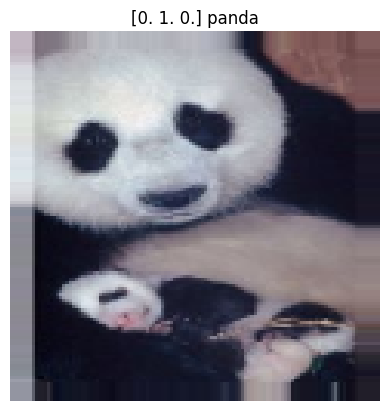

In [ ]:
display_image(augz_train, 1)

## Train best model with augmented data

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.augz-model-2.hg5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)

early_stop_callback = EarlyStopping(monitor="val_loss", patience=20, verbose=1)

In [ ]:
history2 = model2.fit(augz_train, epochs=200, validation_data=val, callbacks=[checkpoint_callback, early_stop_callback], verbose=1)

Epoch 1/200
23/23 [==============================] - 7s 241ms/step - loss: 0.1307 - accuracy: 0.9596 - val_loss: 0.2714 - val_accuracy: 0.9250
Epoch 2/200
23/23 [==============================] - 6s 246ms/step - loss: 0.0569 - accuracy: 0.9777 - val_loss: 0.2344 - val_accuracy: 0.9250
Epoch 3/200
23/23 [==============================] - 5s 204ms/step - loss: 0.0381 - accuracy: 0.9903 - val_loss: 0.2455 - val_accuracy: 0.9208
Epoch 4/200
23/23 [==============================] - 5s 199ms/step - loss: 0.0239 - accuracy: 0.9958 - val_loss: 0.2680 - val_accuracy: 0.9250
Epoch 5/200
23/23 [==============================] - 5s 198ms/step - loss: 0.0231 - accuracy: 0.9930 - val_loss: 0.3332 - val_accuracy: 0.9167
Epoch 6/200
23/23 [==============================] - 5s 199ms/step - loss: 0.0350 - accuracy: 0.9875 - val_loss: 0.3309 - val_accuracy: 0.9208
Epoch 7/200
23/23 [==============================] - 5s 199ms/step - loss: 0.0315 - accuracy: 0.9889 - val_loss: 0.3297 - val_accuracy: 0.9208

## Visualize learning curves

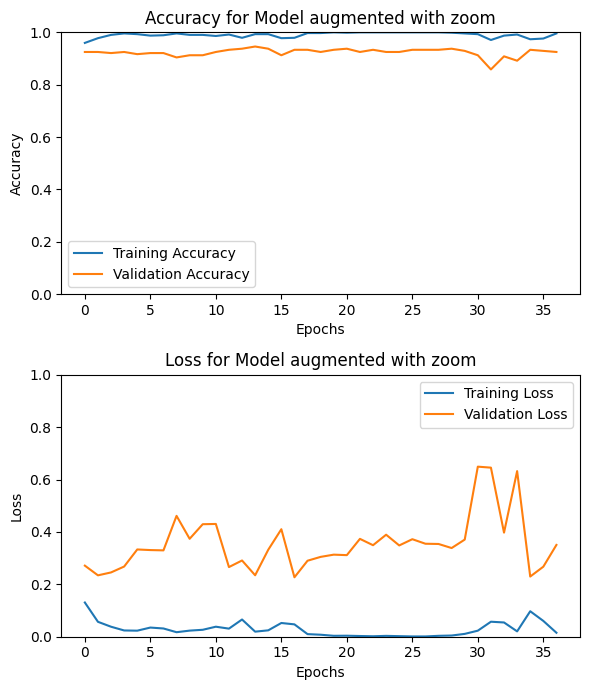

In [ ]:
plot_history(history2, "Model augmented with zoom")

## Peek predictions

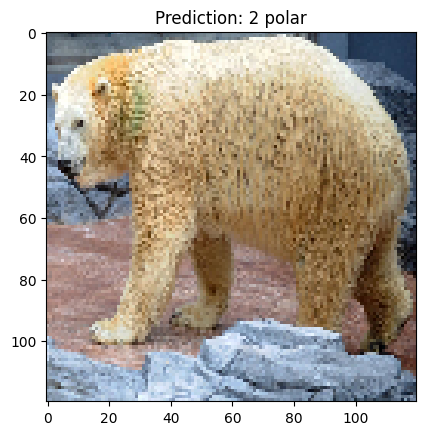

Ground truth: polar 2 [0. 0. 1.]
Prediction:	polar 2 [[1.2103256e-01 2.6106472e-06 8.7896478e-01]]


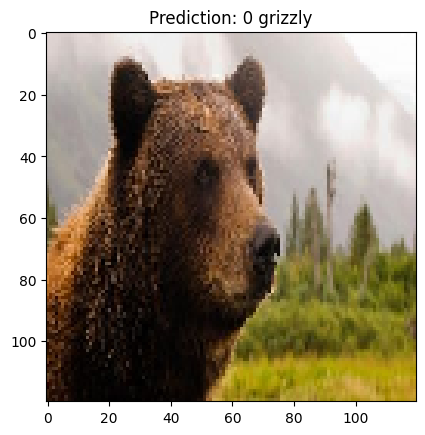

Ground truth: grizzly 0 [1. 0. 0.]
Prediction:	grizzly 0 [[9.998895e-01 5.312733e-05 5.731345e-05]]


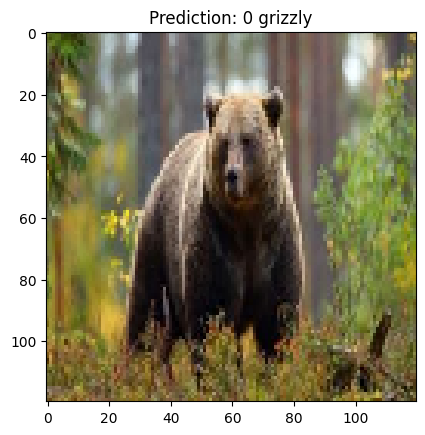

Ground truth: grizzly 0 [1. 0. 0.]
Prediction:	grizzly 0 [[9.9921441e-01 7.8135432e-04 4.1236717e-06]]


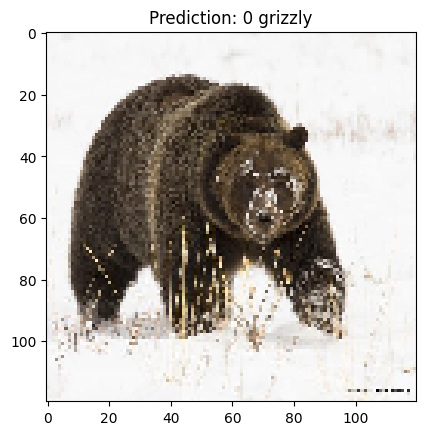

Ground truth: grizzly 0 [1. 0. 0.]
Prediction:	grizzly 0 [[1.0000000e+00 2.3425137e-08 1.9440161e-09]]


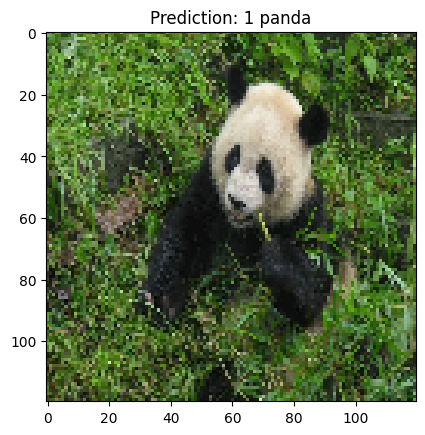

Ground truth: panda 1 [0. 1. 0.]
Prediction:	panda 1 [[2.1065138e-03 9.9788159e-01 1.1871282e-05]]


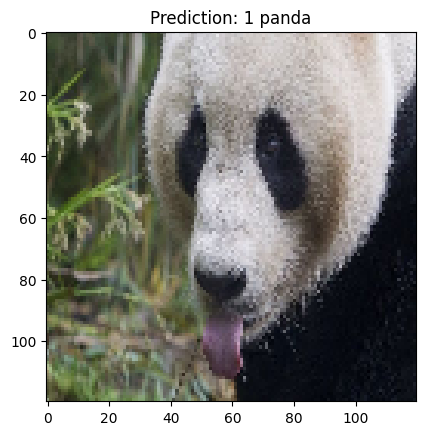

Ground truth: panda 1 [0. 1. 0.]
Prediction:	panda 1 [[3.6964868e-04 9.9961472e-01 1.5558820e-05]]


In [ ]:
peek_predictions(model2, val)

# Load best model and augment with rotate

In [ ]:
from keras import saving
model3 = saving.load_model('/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.fitmodel-7.hg5')

In [ ]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer_conv (Conv2D)   (None, 120, 120, 64)      1792      
                                                                 
 first_layer_pool (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 2, 2, 32)         

In [ ]:
model3.evaluate(val)

8/8 [==============================] - 1s 77ms/step - loss: 0.1935 - accuracy: 0.9333


[0.19353388249874115, 0.9333333373069763]

In [ ]:
#peek_predictions(model3, val)

## Prepare augmented data sets

In [ ]:
augmentation_gen = ImageDataGenerator(rescale=1./255, rotation_range=30)

In [ ]:
#original variables, update or keep the same
image_size = train.image_shape[:2]
batch = batch
augr_train = augmentation_gen.flow_from_directory("/content/bears/training", target_size=image_size, batch_size=batch, class_mode='categorical')

Found 718 images belonging to 3 classes.


In [ ]:
augr_train.image_shape

(120, 120, 3)

(32, 120, 120, 3)


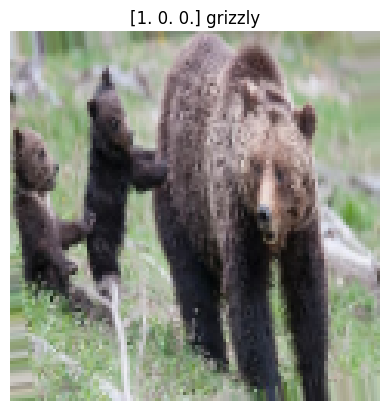

In [ ]:
display_image(augr_train, 1)

## Train best model with augmented data

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.augr-model-3.hg5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)

early_stop_callback = EarlyStopping(monitor="val_loss", patience=20, verbose=1)

In [ ]:
history3 = model3.fit(augr_train, epochs=200, validation_data=val, callbacks=[checkpoint_callback, early_stop_callback], verbose=1)

Epoch 1/200
23/23 [==============================] - 7s 236ms/step - loss: 0.1795 - accuracy: 0.9401 - val_loss: 0.2144 - val_accuracy: 0.9292
Epoch 2/200
23/23 [==============================] - 5s 199ms/step - loss: 0.0636 - accuracy: 0.9819 - val_loss: 0.2469 - val_accuracy: 0.9250
Epoch 3/200
23/23 [==============================] - 5s 199ms/step - loss: 0.0409 - accuracy: 0.9944 - val_loss: 0.2805 - val_accuracy: 0.9208
Epoch 4/200
23/23 [==============================] - 5s 201ms/step - loss: 0.0521 - accuracy: 0.9847 - val_loss: 0.2814 - val_accuracy: 0.9250
Epoch 5/200
23/23 [==============================] - 5s 201ms/step - loss: 0.0562 - accuracy: 0.9861 - val_loss: 0.3575 - val_accuracy: 0.9292
Epoch 6/200
23/23 [==============================] - 5s 197ms/step - loss: 0.0794 - accuracy: 0.9721 - val_loss: 0.2669 - val_accuracy: 0.9333
Epoch 7/200
23/23 [==============================] - 5s 199ms/step - loss: 0.0323 - accuracy: 0.9903 - val_loss: 0.2964 - val_accuracy: 0.9292

## Visualize learning curves

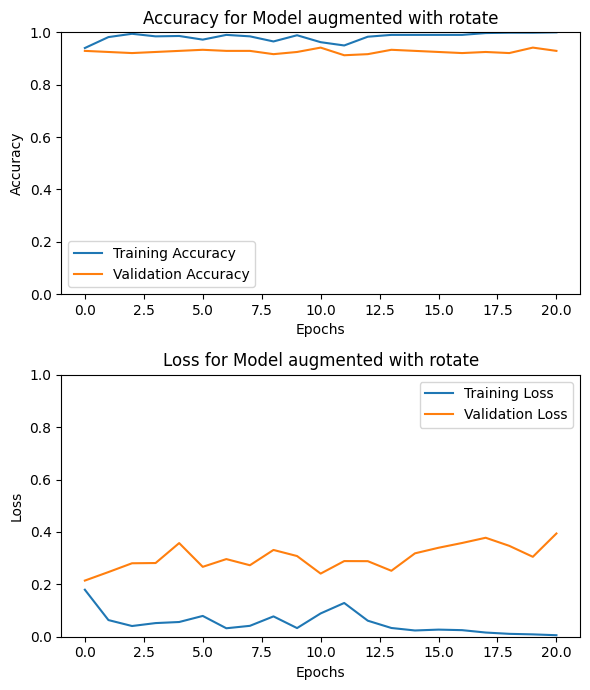

In [ ]:
plot_history(history3, "Model augmented with rotate")

## Peek predictions

In [ ]:
#peek_predictions(model3, val)

# Load best model and augment with flip

In [ ]:
from keras import saving
model4 = saving.load_model('/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.fitmodel-7.hg5')

In [ ]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer_conv (Conv2D)   (None, 120, 120, 64)      1792      
                                                                 
 first_layer_pool (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 2, 2, 32)         

In [ ]:
model4.evaluate(val)

8/8 [==============================] - 1s 75ms/step - loss: 0.1935 - accuracy: 0.9333


[0.19353386759757996, 0.9333333373069763]

In [ ]:
#peek_predictions(model3, val)

## Prepare augmented data sets

In [ ]:
augmentation_gen = ImageDataGenerator(rescale=1./255, rotation_range=30)

In [ ]:
#original variables, update or keep the same
image_size = train.image_shape[:2]
batch = batch
augf_train = augmentation_gen.flow_from_directory("/content/bears/training", target_size=image_size, batch_size=batch, class_mode='categorical')

Found 718 images belonging to 3 classes.


In [ ]:
augr_train.image_shape

(120, 120, 3)

(32, 120, 120, 3)


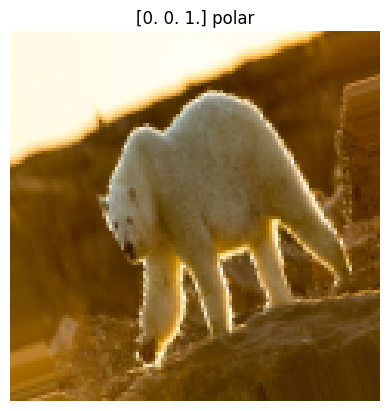

In [ ]:
display_image(augf_train, 1)

## Train best model with augmented data

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.augf-model-4.hg5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)

early_stop_callback = EarlyStopping(monitor="val_loss", patience=20, verbose=1)

In [ ]:
history4 = model4.fit(augf_train, epochs=200, validation_data=val, callbacks=[checkpoint_callback, early_stop_callback], verbose=1)

Epoch 1/200
23/23 [==============================] - 8s 242ms/step - loss: 0.1331 - accuracy: 0.9596 - val_loss: 0.1828 - val_accuracy: 0.9417
Epoch 2/200
23/23 [==============================] - 5s 201ms/step - loss: 0.0792 - accuracy: 0.9721 - val_loss: 0.5215 - val_accuracy: 0.8750
Epoch 3/200
23/23 [==============================] - 5s 199ms/step - loss: 0.1036 - accuracy: 0.9624 - val_loss: 0.2792 - val_accuracy: 0.9250
Epoch 4/200
23/23 [==============================] - 5s 197ms/step - loss: 0.0593 - accuracy: 0.9791 - val_loss: 0.2941 - val_accuracy: 0.9208
Epoch 5/200
23/23 [==============================] - 5s 202ms/step - loss: 0.0503 - accuracy: 0.9861 - val_loss: 0.3108 - val_accuracy: 0.9250
Epoch 6/200
23/23 [==============================] - 5s 200ms/step - loss: 0.0510 - accuracy: 0.9819 - val_loss: 0.3584 - val_accuracy: 0.9208
Epoch 7/200
23/23 [==============================] - 5s 198ms/step - loss: 0.0599 - accuracy: 0.9791 - val_loss: 0.3559 - val_accuracy: 0.9333

## Visualize learning curves

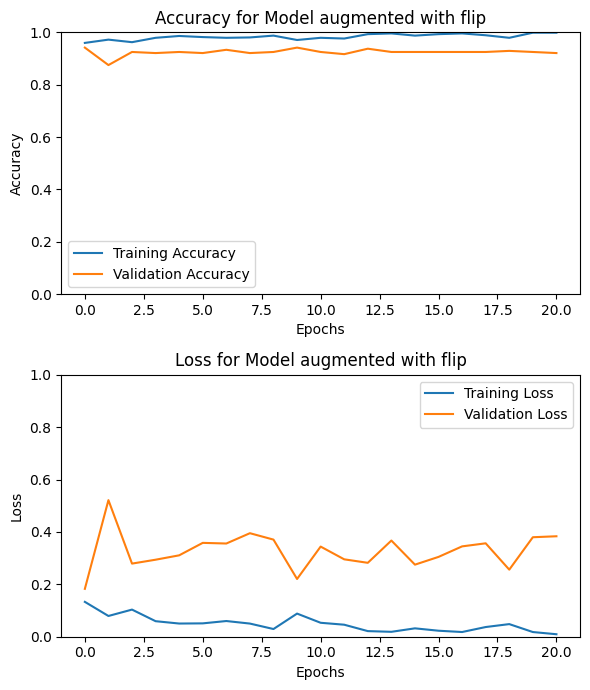

In [ ]:
plot_history(history4, "Model augmented with flip")

## Peek predictions

In [ ]:
#peek_predictions(model4, val)

# Recreate The Best Model and retrain

In [ ]:
# update model number!!
from tensorflow.keras import datasets, layers, models
num_filters = [64, 64, 32, 32]
filter_shape = (3, 3)
print(f'{train.image_shape=}')
inputshape = train.image_shape
pad = 'same'
pool = (4,4)


# convolutional base
model7 = models.Sequential()
model7.add(layers.Conv2D(num_filters[0], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape, name="first_layer_conv"))
model7.add(layers.MaxPooling2D(pool_size=pool, padding=pad, name="first_layer_pool"))

model7.add(layers.Conv2D(num_filters[1], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
model7.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model7.add(layers.Conv2D(num_filters[2], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
model7.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model7.add(layers.Conv2D(num_filters[3], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
#model7.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

# add dense layers on top
model7.add(layers.Flatten())
model7.add(layers.Dense(16, activation='relu'))
model7.add(layers.Dense(8, activation='relu'))
model7.add(layers.Dense(3, activation='softmax'))

model7.summary()

train.image_shape=(120, 120, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer_conv (Conv2D)   (None, 120, 120, 64)      1792      
                                                                 
 first_layer_pool (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 64)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_1 (MaxPoo

In [ ]:
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.retrainbest-aug.hg5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)

early_stop_callback = EarlyStopping(monitor="val_loss", patience=20, verbose=1)


In [ ]:
history7 = model7.fit(aug_train, epochs=200, validation_data=val, callbacks=[checkpoint_callback, early_stop_callback], verbose=1)

Epoch 1/200
23/23 [==============================] - 6s 267ms/step - loss: 0.6144 - accuracy: 0.6964 - val_loss: 0.6407 - val_accuracy: 0.6833
Epoch 2/200
23/23 [==============================] - 6s 251ms/step - loss: 0.5878 - accuracy: 0.7089 - val_loss: 0.6252 - val_accuracy: 0.6958
Epoch 3/200
23/23 [==============================] - 5s 208ms/step - loss: 0.6656 - accuracy: 0.6727 - val_loss: 0.6926 - val_accuracy: 0.7000
Epoch 4/200
23/23 [==============================] - 5s 202ms/step - loss: 0.5835 - accuracy: 0.7563 - val_loss: 0.7092 - val_accuracy: 0.7125
Epoch 5/200
23/23 [==============================] - 6s 249ms/step - loss: 0.5085 - accuracy: 0.7883 - val_loss: 0.5147 - val_accuracy: 0.7875
Epoch 6/200
23/23 [==============================] - 6s 249ms/step - loss: 0.4607 - accuracy: 0.7994 - val_loss: 0.5141 - val_accuracy: 0.7958
Epoch 7/200
23/23 [==============================] - 5s 201ms/step - loss: 0.4331 - accuracy: 0.8287 - val_loss: 0.6715 - val_accuracy: 0.6958

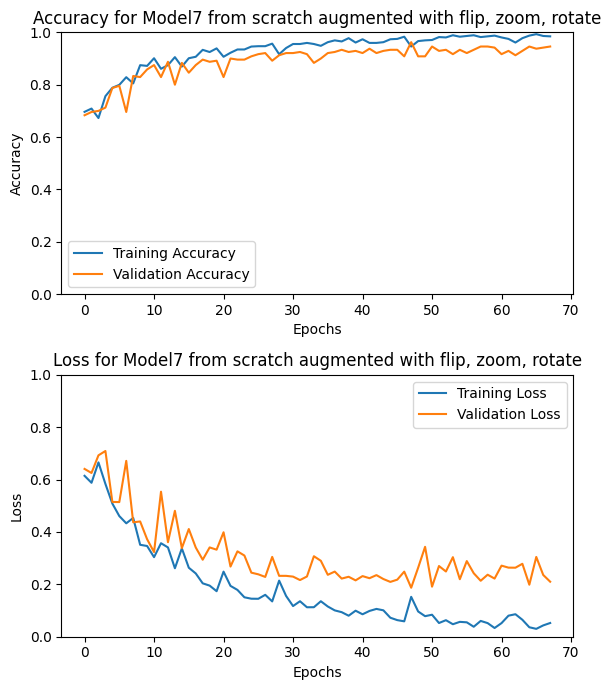

In [ ]:
plot_history(history7, "Model7 from scratch augmented with flip, zoom, rotate")

# Recreate The Best Model and retrain with flip

In [ ]:
# update model number!!
from tensorflow.keras import datasets, layers, models
num_filters = [64, 64, 32, 32]
filter_shape = (3, 3)
print(f'{train.image_shape=}')
inputshape = train.image_shape
pad = 'same'
pool = (4,4)


# convolutional base
model7a = models.Sequential()
model7a.add(layers.Conv2D(num_filters[0], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape, name="first_layer_conv"))
model7a.add(layers.MaxPooling2D(pool_size=pool, padding=pad, name="first_layer_pool"))

model7a.add(layers.Conv2D(num_filters[1], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
model7a.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model7a.add(layers.Conv2D(num_filters[2], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
model7a.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model7a.add(layers.Conv2D(num_filters[3], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
#model7a.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

# add dense layers on top
model7a.add(layers.Flatten())
model7a.add(layers.Dense(16, activation='relu'))
model7a.add(layers.Dense(8, activation='relu'))
model7a.add(layers.Dense(3, activation='softmax'))

model7a.summary()

train.image_shape=(120, 120, 3)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer_conv (Conv2D)   (None, 120, 120, 64)      1792      
                                                                 
 first_layer_pool (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_3 (MaxP

In [ ]:
model7a.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.retrainbest-augf.hg5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)

early_stop_callback = EarlyStopping(monitor="val_loss", patience=20, verbose=1)


In [ ]:
history7a = model7a.fit(aug_train, epochs=200, validation_data=val, callbacks=[checkpoint_callback, early_stop_callback], verbose=1)

Epoch 1/200
23/23 [==============================] - 7s 243ms/step - loss: 1.0933 - accuracy: 0.3928 - val_loss: 1.0617 - val_accuracy: 0.4333
Epoch 2/200
23/23 [==============================] - 6s 247ms/step - loss: 0.9652 - accuracy: 0.5279 - val_loss: 0.8411 - val_accuracy: 0.5333
Epoch 3/200
23/23 [==============================] - 5s 201ms/step - loss: 0.7063 - accuracy: 0.6797 - val_loss: 0.8623 - val_accuracy: 0.6833
Epoch 4/200
23/23 [==============================] - 6s 267ms/step - loss: 0.6350 - accuracy: 0.7354 - val_loss: 0.6441 - val_accuracy: 0.7792
Epoch 5/200
23/23 [==============================] - 6s 250ms/step - loss: 0.5301 - accuracy: 0.7841 - val_loss: 0.5258 - val_accuracy: 0.8125
Epoch 6/200
23/23 [==============================] - 6s 251ms/step - loss: 0.4354 - accuracy: 0.8329 - val_loss: 0.4632 - val_accuracy: 0.8375
Epoch 7/200
23/23 [==============================] - 5s 201ms/step - loss: 0.3894 - accuracy: 0.8454 - val_loss: 0.4844 - val_accuracy: 0.8458

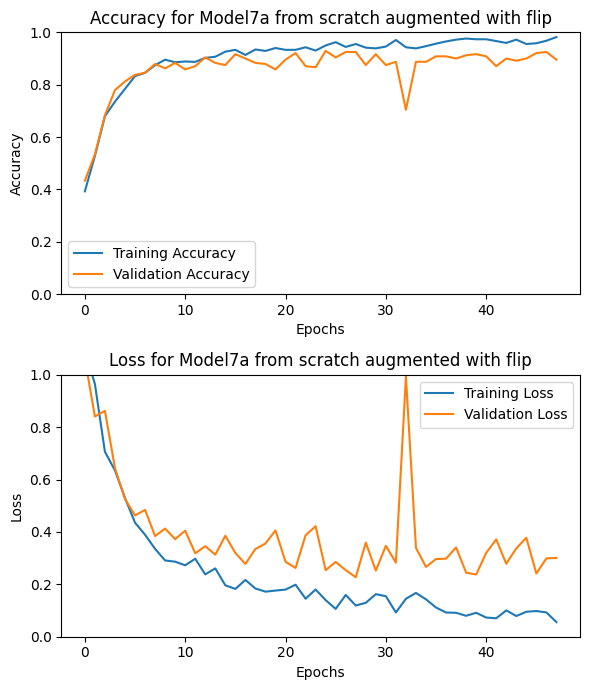

In [ ]:
plot_history(history7a, "Model7a from scratch augmented with flip")

# Recreate The Best Model and retrain with zoom

In [ ]:
# update model number!!
from tensorflow.keras import datasets, layers, models
num_filters = [64, 64, 32, 32]
filter_shape = (3, 3)
print(f'{train.image_shape=}')
inputshape = train.image_shape
pad = 'same'
pool = (4,4)


# convolutional base
model7b = models.Sequential()
model7b.add(layers.Conv2D(num_filters[0], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape, name="first_layer_conv"))
model7b.add(layers.MaxPooling2D(pool_size=pool, padding=pad, name="first_layer_pool"))

model7b.add(layers.Conv2D(num_filters[1], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
model7b.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model7b.add(layers.Conv2D(num_filters[2], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
model7b.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model7b.add(layers.Conv2D(num_filters[3], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
#model7b.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

# add dense layers on top
model7b.add(layers.Flatten())
model7b.add(layers.Dense(16, activation='relu'))
model7b.add(layers.Dense(8, activation='relu'))
model7b.add(layers.Dense(3, activation='softmax'))

model7b.summary()

train.image_shape=(120, 120, 3)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer_conv (Conv2D)   (None, 120, 120, 64)      1792      
                                                                 
 first_layer_pool (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_5 (MaxP

In [ ]:
model7b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.retrainbest-aug.hg5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)

early_stop_callback = EarlyStopping(monitor="val_loss", patience=20, verbose=1)


In [ ]:
history7b = model7b.fit(augz_train, epochs=200, validation_data=val, callbacks=[checkpoint_callback, early_stop_callback], verbose=1)

Epoch 1/200
23/23 [==============================] - 8s 270ms/step - loss: 1.0988 - accuracy: 0.3203 - val_loss: 1.0920 - val_accuracy: 0.3083
Epoch 2/200
23/23 [==============================] - 7s 300ms/step - loss: 1.0382 - accuracy: 0.4471 - val_loss: 1.0658 - val_accuracy: 0.3583
Epoch 3/200
23/23 [==============================] - 6s 283ms/step - loss: 0.9016 - accuracy: 0.5529 - val_loss: 0.8929 - val_accuracy: 0.5000
Epoch 4/200
23/23 [==============================] - 6s 277ms/step - loss: 0.8464 - accuracy: 0.5682 - val_loss: 0.8820 - val_accuracy: 0.4917
Epoch 5/200
23/23 [==============================] - 6s 274ms/step - loss: 0.8527 - accuracy: 0.5710 - val_loss: 0.8514 - val_accuracy: 0.5083
Epoch 6/200
23/23 [==============================] - 5s 229ms/step - loss: 0.7638 - accuracy: 0.5947 - val_loss: 0.8999 - val_accuracy: 0.4958
Epoch 7/200
23/23 [==============================] - 5s 227ms/step - loss: 0.7489 - accuracy: 0.6323 - val_loss: 0.9513 - val_accuracy: 0.4958

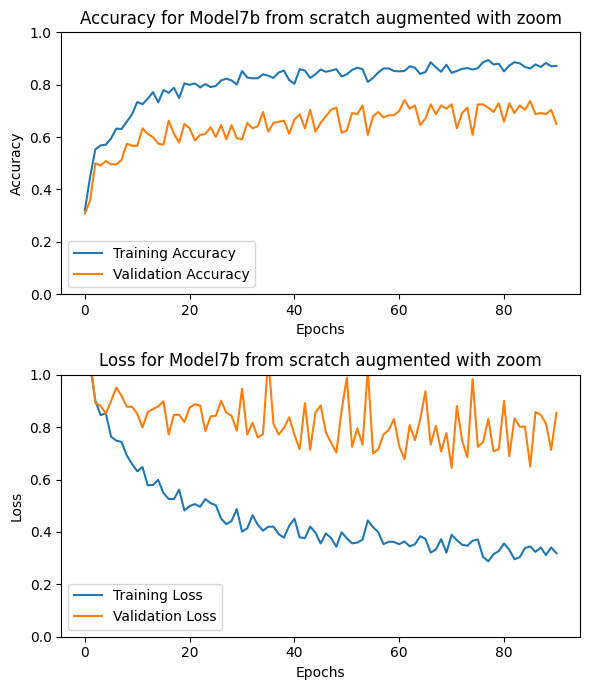

In [ ]:
plot_history(history7b, "Model7b from scratch augmented with zoom")

# Recreate The Best Model and retrain with rotate

In [ ]:
# update model number!!
from tensorflow.keras import datasets, layers, models
num_filters = [64, 64, 32, 32]
filter_shape = (3, 3)
print(f'{train.image_shape=}')
inputshape = train.image_shape
pad = 'same'
pool = (4,4)


# convolutional base
model7c = models.Sequential()
model7c.add(layers.Conv2D(num_filters[0], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape, name="first_layer_conv"))
model7c.add(layers.MaxPooling2D(pool_size=pool, padding=pad, name="first_layer_pool"))

model7c.add(layers.Conv2D(num_filters[1], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
model7c.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model7c.add(layers.Conv2D(num_filters[2], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
model7c.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

model7c.add(layers.Conv2D(num_filters[3], kernel_size=filter_shape, activation='relu', padding=pad, input_shape=inputshape))
#model7c.add(layers.MaxPooling2D(pool_size=pool, padding=pad))

# add dense layers on top
model7c.add(layers.Flatten())
model7c.add(layers.Dense(16, activation='relu'))
model7c.add(layers.Dense(8, activation='relu'))
model7c.add(layers.Dense(3, activation='softmax'))

model7c.summary()

train.image_shape=(120, 120, 3)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer_conv (Conv2D)   (None, 120, 120, 64)      1792      
                                                                 
 first_layer_pool (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_7 (MaxP

In [ ]:
model7c.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_filepath = '/content/drive/MyDrive/Colab Notebooks/tmp-models/chkpt.retrainbest-augr.hg5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', mode='min', save_best_only=True)

early_stop_callback = EarlyStopping(monitor="val_loss", patience=20, verbose=1)


In [ ]:
history7c = model7c.fit(augr_train, epochs=200, validation_data=val, callbacks=[checkpoint_callback, early_stop_callback], verbose=1)

Epoch 1/200
23/23 [==============================] - 8s 263ms/step - loss: 1.0749 - accuracy: 0.4568 - val_loss: 0.9840 - val_accuracy: 0.5583
Epoch 2/200
23/23 [==============================] - 6s 247ms/step - loss: 0.8251 - accuracy: 0.6226 - val_loss: 0.7459 - val_accuracy: 0.5917
Epoch 3/200
23/23 [==============================] - 5s 198ms/step - loss: 0.6995 - accuracy: 0.6657 - val_loss: 0.8182 - val_accuracy: 0.6708
Epoch 4/200
23/23 [==============================] - 6s 248ms/step - loss: 0.6067 - accuracy: 0.7228 - val_loss: 0.6191 - val_accuracy: 0.7875
Epoch 5/200
23/23 [==============================] - 6s 244ms/step - loss: 0.5430 - accuracy: 0.7827 - val_loss: 0.5383 - val_accuracy: 0.8000
Epoch 6/200
23/23 [==============================] - 5s 202ms/step - loss: 0.4266 - accuracy: 0.8440 - val_loss: 0.6539 - val_accuracy: 0.7667
Epoch 7/200
23/23 [==============================] - 5s 200ms/step - loss: 0.3999 - accuracy: 0.8496 - val_loss: 0.5788 - val_accuracy: 0.8292

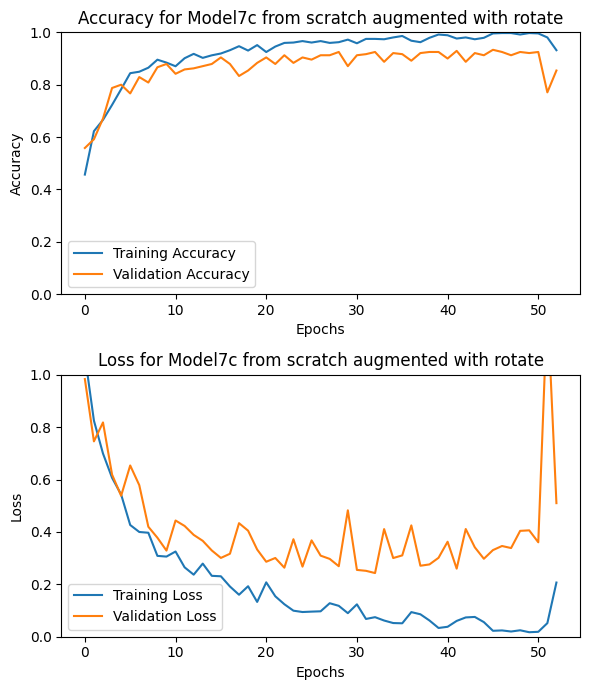

In [ ]:
plot_history(history7c, "Model7c from scratch augmented with rotate")